# View data

Here, you can load data sets you've generated, display streamplots and observe the divergence and curl.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from phase2vec.data._utils import divergence, jacobian, curl
plt.style.use('ggplot')

/Users/nomo/opt/miniconda3/envs/phase2vec2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data

In [2]:
data_name = 'classical' # Edit this line
outdir = '../'
data_dir  = os.path.join(outdir, 'data', data_name) # And this line 
data_fn   = os.path.join(data_dir, 'X_train.npy')
labels_fn = os.path.join(data_dir, 'y_train.npy')
pars_fn = os.path.join(data_dir, 'p_train.npy')

data   = np.load(data_fn)
labels = np.load(labels_fn)
pars = np.load(pars_fn)

num_data = data.shape[0]
num_vis = 16
vis_inds = np.random.permutation(num_data)[:num_vis]

vis_data = [data[ind] for ind in vis_inds]
vis_labels = [labels[ind] for ind in vis_inds]
vis_pars = [pars[ind] for ind in vis_inds]

## Visualize stream plots

/var/folders/8y/cpqrd46n7ml80f139vjz9l240000gn/T/ipykernel_45604/1803372196.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=None)


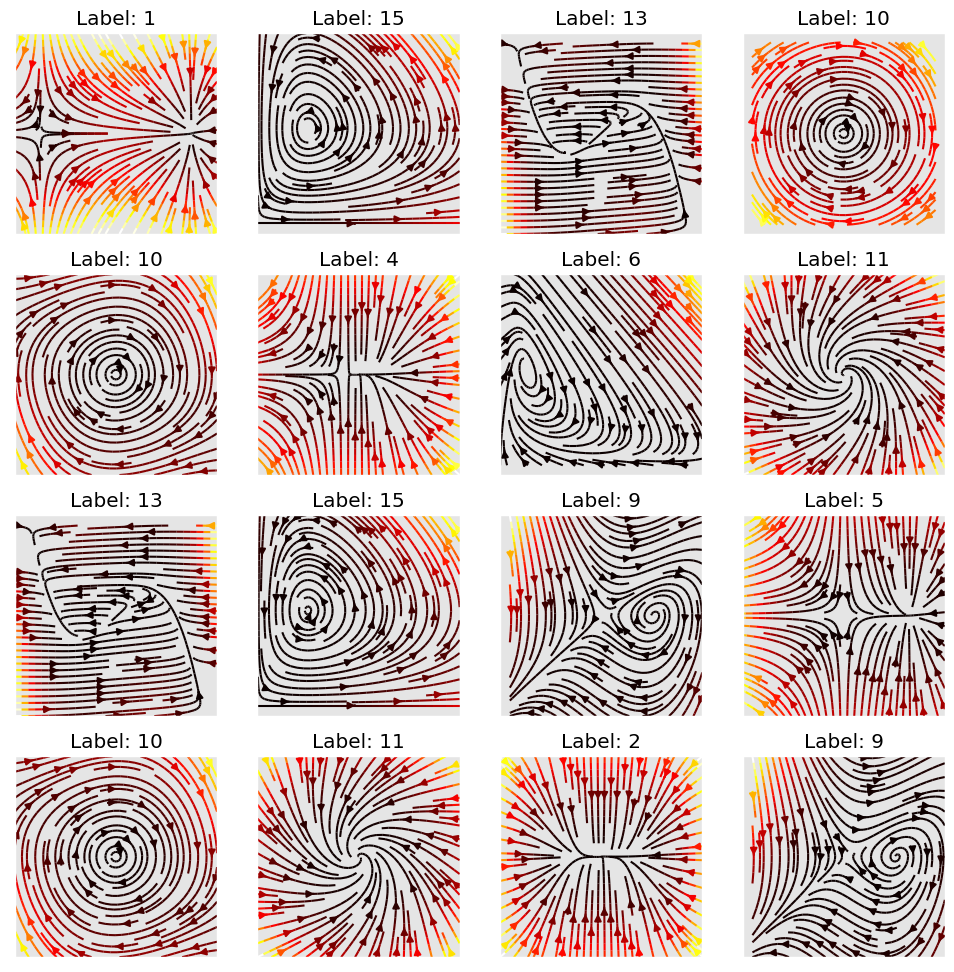

In [3]:
fig, axes = plt.subplots(4,4,figsize=(12,12))

x = np.linspace(-1.0,1.0,64)
y = np.linspace(-1.0,1.0,64)
for datum, label, par, ax in zip(vis_data, vis_labels, vis_pars, axes.reshape(-1)):
    datum = datum.transpose(0,2,1)
    ax.streamplot(x,y,datum[0],datum[1],color=(datum**2).sum(0), cmap='hot')
    ax.set_title(f'Label: {label}')
    ax.grid(b=None)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()
plt.close()

## Visualize divergence

/var/folders/8y/cpqrd46n7ml80f139vjz9l240000gn/T/ipykernel_45604/4016734163.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  Ds = divergence(torch.tensor(vis_data),spacings=(torch.tensor(x),torch.tensor(x)))


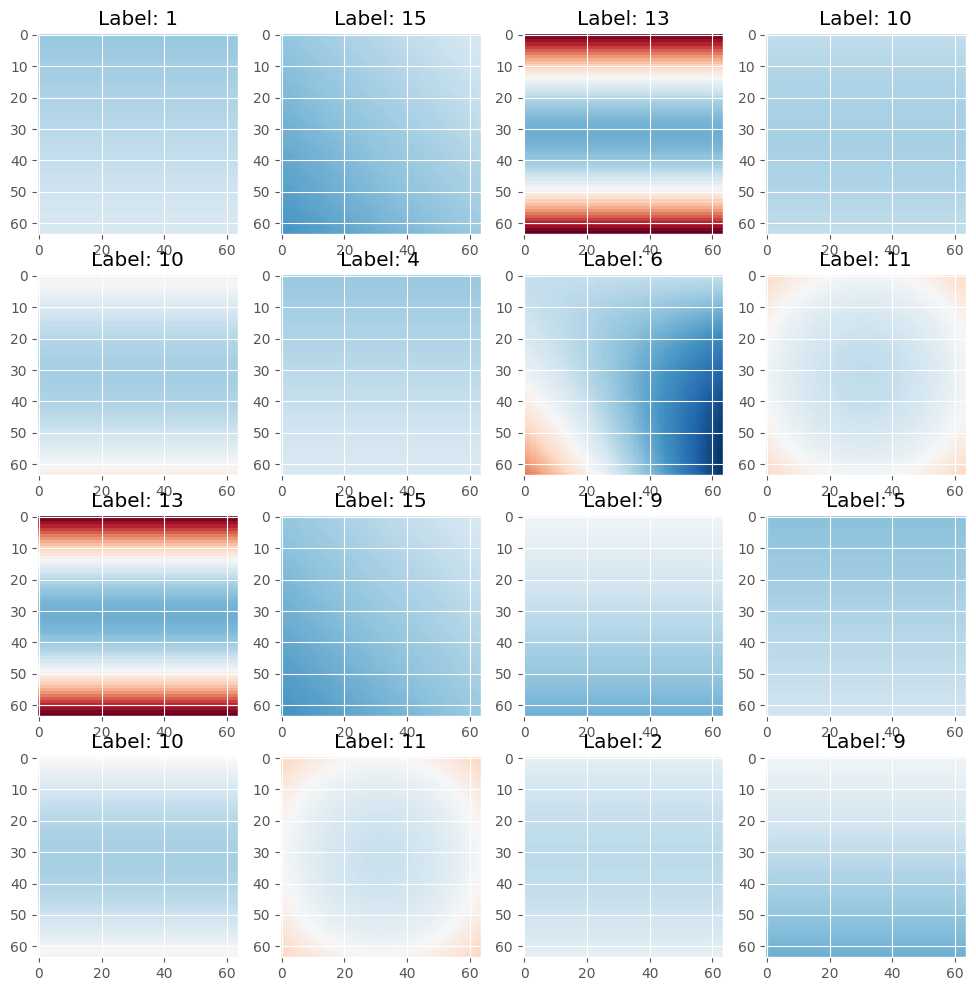

In [4]:
fig, axes = plt.subplots(4,4,figsize=(12,12))

Ds = divergence(torch.tensor(vis_data),spacings=(torch.tensor(x),torch.tensor(x)))
vmin = Ds.min()
vmax = Ds.max()
for datum, label, ax in zip(Ds, vis_labels, axes.reshape(-1)):
    ax.imshow(datum,cmap='RdBu', vmin=vmin, vmax=vmax)
    ax.set_title(f'Label: {label}')
plt.show()
plt.close()

## Visualize curl

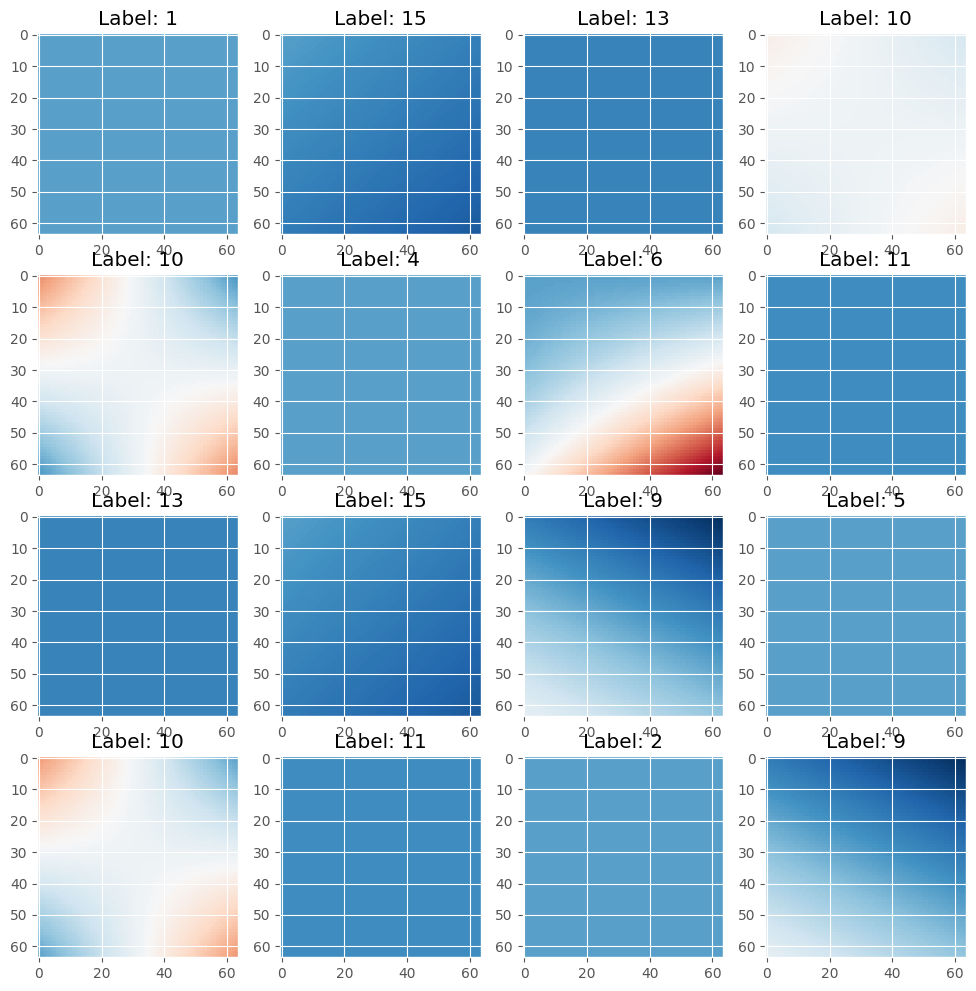

In [6]:
fig, axes = plt.subplots(4,4,figsize=(12,12))

Cs = curl(torch.tensor(vis_data),spacings=(torch.tensor(x),torch.tensor(x)))
vmin = Cs.min()
vmax = Cs.max()
for datum, label, ax in zip(Cs, vis_labels, axes.reshape(-1)):
    ax.imshow(datum[-1,...,0],cmap='RdBu', vmin=vmin, vmax=vmax)
    ax.set_title(f'Label: {label}')
plt.show()
plt.close()